# Aria Project
## 1.Perkenalan
`Fachmi Maris`

Batch HCK_002




### Dataset

Pada penelitian ini menggunakan dataset yang telah disediakan ARIA Indonesia.Aria merupakan perusahaan yang mengubah pertanian melalui Internet-of-things & big data. Aria pun hadir untuk meningkatkan kinerja perusahaan peternakan. 

Penelitian ini akan melakukan prediksi pada nilai target yang memiliki fitur dari v1 sampai v8 dan sample_type

### Source Dataset :
https://github.com/ardhiraka/talent_fair_sample_challenge/blob/main/datasets/aria_data.xlsx

### OBJECTIVES

- Mampu membuat model prediksi data nutrisi tanaman yang telah diperoleh dari lab uji.
- Mampu mengeksplorasi dan menganalisis dataset.
- Mampu menjelaskan cara mengevaluasi model.
- Mampu menjelaskan metodologi yang digunakan untuk setiap langkah, algoritma, manipulasi data, - pembersihan data, dll.
- Mampu memberikan rencana perbaikan lebih lanjut.

### PROBLEM STATEMENT
Memprediksi nilai target menggunakan model regresi

## 2. Import Library
Memanggil library yang dibutuhkan dalam penelitian ini

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


# For Regression Problems
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Standarize the Datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 150)
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading
Memanggil dataset yang digunakan dalam penelitian ini

In [4]:
df = pd.read_csv('aria_data.csv')

dataset pada penelitian ini diberi nama df 

In [5]:
df

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


|      `COLUMN`      | DESKRIPSI                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `target`    | Informasi untuk memprediksi nutrisi tanaman                                                                                       |
|      `V1 - V8`      | Informasi tentang variabel untuk memprediksi nutrisi tanaman                                                            |
|  `sample_type`   | Informasi tentang 2 sampel laboratorium berbeda yang diperoleh  |

Menampilkan data 5 baris teratas pada dataset 

In [6]:
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


Menampilkan 5 data terbawah pada dataset

In [7]:
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


Menampilkan info apa saja yang ada di df dengan menggunakan fungsi .info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


Dataset yang digunakan terdiri dari 160 baris dan 10 kolom. Terlihat tidak ditemukan missing value dari dataset. Setiap kolom akan dicek nilainya dan tipe datanya

Memeriksa dataset data terduplikat pada df

In [10]:

df[df.duplicated()].shape

(0, 10)

Tidak ditemukan data yang terduplikat berdasarkan fungsi duplicated

In [9]:
# Memastikan apakah terdapat missing values pada df
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

Berdasarkan kode di atas tidak ditemukan missing values pada dataset

Langkah berikutnya adalah membuat variabel yang memisahkan kolom numerikal dan kolom kategorikal.


|      `Jenis Kolom`      | DESKRIPSI                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `Numerikal`    | Kolom yang berisi data berupa angka yang dapat diukur atau dihitung                                                                       |
|      `Kategorikal`      | Kolom yang berisi data berupa data berupa string angka yang dapat tidak dapat diukur atau dihitung secara matematis                                      |

In [11]:
numerical = ['target','v1','v2','v3','v4','v5','v6','v7','v8']
categorical = ['sample_type']

Langkah selanjutnya adalah menggunakan fungsi describe untuk melakukan perhitungan statistik sederhan

In [12]:
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Menampilkan tampilan fungsi description untuk melihat pengolahan data statistik sederhana. Berdasarkan hasil yang telah dipaparkan di atas, diketahui tidak ada kejanggalan pada data numerik seperti data hilang(missing values) nilai 99999 dst, sehingga dapat diproses ke tahap selanjutnya.

Langkag selanjutnya melihat isi data pada kolom kategorikal

In [13]:
for i in categorical:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

sample_type

lab 1    100
lab 2     60
Name: sample_type, dtype: int64
----------


Pada kolom kategorikal terdiri dari unique value type lab 1 dan lab 2 

Berdasarkan peninjauan di awal, diperoleh informasi sebagai berikut :
- Tidak ditemukan data yang terduplikat
- Tidak ditemukan missing values
- Data terdiri dari kolom numerikal dan kolom kategorikal

### Data Cleaning

In [14]:
#duplikasi data
df_clean = df.copy()

df diduplikasi agar saat proses penelitian tidak mengubah dataset utama

## 4.Exploratory Data Analysis (EDA)

Tahap ini bertujuan untuk mengekplor dataset

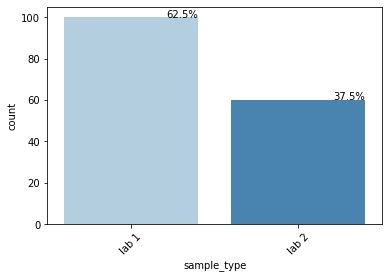

In [15]:
ax = sns.countplot(x="sample_type", data=df_clean, palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
  x = p.get_x() + p.get_width()
  y = p.get_height()
  ax.annotate(percentage, (x, y),ha='right')

Berdasarkan visualisasi di atas diketahui bahwa lab 1 memiliki data yang lebih banyak dibanding dengan lab 2. Lab 1 memiliki 100 data dan lab 2 60 data.

In [17]:
px.box(df,x='sample_type',y='target',
       color='sample_type',template='ggplot2',
       labels={'sample_type':'sample_type',
               'target':'target'},
       title="<b>target on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di lab 1 memiliki nilai `target` paling rendah `4.36` dan paling tinggi `5.26`. Sample di lab 2 memiliki nilai `target` paling rendah `4.13` dan paling tinggi `5.11`.
Jika dibandingkan maka nilai `target` paling rendah berada di `sample_type lab 2` dan nilai `target` tertinggi berada di `sample type lab 1` .

In [18]:
px.box(df, x='sample_type', y='v1',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v1': 'v1'},
       title="<b>v1 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di lab 1 memiliki nilai `v1` paling rendah `227.2857` dan paling tinggi `360.667`. Sample di lab 2 memiliki nilai `v1` paling rendah `482.562` dan paling tinggi `678.375`.

Jika dibandingkan maka nilai `v1` paling rendah berada di `sample_type lab 1`  dan nilai `v1` tertinggi berada di `sample type lab 2`.

In [19]:
px.box(df, x='sample_type', y='v2',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v2': 'v2'},
       title="<b>v2 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di lab 1 memiliki nilai `v2` paling rendah `178.8` dan paling tinggi `265.4375`.
Sample di lab 2 memiliki nilai `v2` paling rendah `182.933` dan paling tinggi `422.8125`.

Jika dibandingkan maka nilai `v2` paling rendah berada di `sample_type lab 1`  dan nilai `v2` tertinggi berada di `sample type lab 2`.

In [20]:
px.box(df, x='sample_type', y='v3',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v3': 'v3'},
       title="<b>v3 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v3` paling rendah `348.9333` dan paling tinggi `461.1429`.
Sample di `lab 2` memiliki nilai `v3` paling rendah `547.86677` dan paling tinggi `722.3125`.

Jika dibandingkan maka nilai `v3` paling rendah berada di `sample_type lab 1`  dan nilai `v3` tertinggi berada di `sample type lab 2`.

In [21]:
px.box(df, x='sample_type', y='v4',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v4': 'v4'},
       title="<b>v4 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v4` paling rendah `313.7333` dan paling tinggi `443.2`.
Sample di `lab 2` memiliki nilai `v4` paling rendah `337.9333` dan paling tinggi `558.5`.

Jika dibandingkan maka nilai `v4` paling rendah berada di `sample_type lab 1`  dan nilai `v4` tertinggi berada di `sample type lab 2`.

In [22]:
px.box(df, x='sample_type', y='v5',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v5': 'v5'},
       title="<b>v5 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v5` paling rendah `373.3333` dan paling tinggi `532.2667`.
Sample di `lab 2` memiliki nilai `v5` paling rendah `457.8667` dan paling tinggi `721`.

Jika dibandingkan maka nilai `v5` paling rendah berada di `sample_type lab 1`  dan nilai `v5` tertinggi berada di `sample type lab 2`.

In [23]:
px.box(df, x='sample_type', y='v6',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v6': 'v6'},
       title="<b>v6 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v6` paling rendah `191.3125` dan paling tinggi `319.3333`.
Sample di `lab 2` memiliki nilai `v6` paling rendah `189.2` dan paling tinggi `415.375`.

Jika dibandingkan maka nilai `v6` paling rendah berada di `sample_type lab 2`  dan nilai `v6` tertinggi berada di `sample type lab 2`.

In [24]:
px.box(df, x='sample_type', y='v7',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v7': 'v7'},
       title="<b>v7 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v7` paling rendah `620.875` dan paling tinggi `853.4667`.
Sample di `lab 2` memiliki nilai `v7` paling rendah `586.2667` dan paling tinggi `806.8571`.

Jika dibandingkan maka nilai `v7` paling rendah berada di `sample_type lab 2`  dan nilai `v7` tertinggi berada di `sample type lab 1`.

In [25]:
px.box(df, x='sample_type', y='v8',
       color='sample_type', template='ggplot2',
       labels={'sample_type': 'sample_type',
               'v8': 'v8'},
       title="<b>v8 on sample_type")

Berdasarkan visualisasi di atas, diketahui bahwa sample di `lab 1` memiliki nilai `v8` paling rendah `3961.625` dan paling tinggi `5086.375`.
Sample di `lab 2` memiliki nilai `v8` paling rendah `3725.667` dan paling tinggi `4836.571`.

Jika dibandingkan maka nilai `v8` paling rendah berada di `sample_type lab 2`  dan nilai `v8` tertinggi berada di `sample type lab 1`.

### Data Split

Tahp ini untuk melakukan pembagian data menjadi data train dan data test. Data train digunakan untuk proses latihan model terhadap data dan data test digunakan prsoes untuk ujian. Dapat dianalogikan model seperti seorang siswa yang akan melakukan proses latihan dengan cara mengerjakan pengayaan materi, soal latihan yang diberikan guru dan buku pelajaran, atau pekerjaan rumah sedangkan data test seperti soarang siswa yang mengerjakan ujian seperti UTS atau UAS.

In [26]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(112, 9)
(48, 9)
(112,)
(48,)


Pada penelitian ini, 70% dataset akan digunakan untuk data train sedangkan 30% dataset akan digunakan untuk data test.
Kolom feature atau X kolom terdiri dari kolom `v1` sampai `v8` dan `sample_type`. kolom target atau y target pada penelitian ini adalah kolom `target`. `X_train` terdiri dari 112 baris dan 9 kolom, `X_test` terdiri dari 48 baris dan 9 kolom sedangkan `y_train` terdiri dari 112 baris dan `y_test` terdiri dari 48 baris. 

### EDA for Modeling
Setelah split data, kemudian akan dilakukan tahap EDA untuk melihat distribusi data dan outlier pada feature numerik data train

In [40]:
eda_df= pd.concat([X_train, y_train], axis = 1)
eda_df

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,target
118,557.266667,210.800000,586.666667,370.733333,462.466667,203.466667,658.466667,4530.333333,lab 2,5.11
95,331.466667,244.866667,424.533333,404.333333,457.800000,257.733333,769.733333,4871.666667,lab 1,4.84
55,272.333333,205.000000,383.266667,366.666667,414.000000,222.333333,711.333333,4701.466667,lab 1,4.59
109,525.333333,195.066667,591.866667,382.733333,478.600000,207.466667,657.200000,4690.600000,lab 2,4.84
18,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333,lab 1,5.26
157,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2,4.63
30,260.562500,192.937500,384.750000,337.812500,405.312500,214.937500,705.687500,4590.875000,lab 1,4.92
94,305.250000,234.250000,434.125000,392.937500,458.500000,252.375000,741.250000,4783.437500,lab 1,4.60
73,290.200000,213.466667,393.000000,381.266667,444.133333,231.000000,760.666667,4761.333333,lab 1,4.62
107,514.125000,205.000000,573.375000,364.562500,474.937500,209.750000,635.562500,4509.500000,lab 2,4.66


Membuat variabel untuk kolom numerik dan kategorikal untuk peroses modeling

In [28]:
num_col = ['v1', 'v2', 'v3','v4','v5','v6','v7','v8']
cat_col = ['sample_type']

### Feature Numerik

Membuat feature numerik

In [32]:
eda_df_num = eda_df[num_col]

### Melihat distribusi data berdasarkan nilai skewness

Langkah ini adalah untuk mengetahui distribusi data pada kolom numerik berdasarkan nilai skewness sehingga kita bisa mengetahui apakah kolom tersebut memiliki distribusi normal atau distribusi tidak normal.

In [33]:
skew = eda_df_num.skew()
skewness = pd.DataFrame(skew)
skewness

,0
v1,0.630966
v2,1.486841
v3,0.609683
v4,1.200801
v5,1.305073
v6,1.356505
v7,-0.264614
v8,-0.712046


In [34]:
skewness.columns =['value']

In [35]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
v1,0.630966,distribusi tidak normal
v2,1.486841,distribusi tidak normal
v3,0.609683,distribusi tidak normal
v4,1.200801,distribusi tidak normal
v5,1.305073,distribusi tidak normal
v6,1.356505,distribusi tidak normal
v7,-0.264614,distribusi normal
v8,-0.712046,distribusi tidak normal


In [36]:
skewness.groupby('distribusi')[['distribusi']].count()

,distribusi
distribusi,
distribusi normal,1
distribusi tidak normal,7


Berdasarkan perhitungan nilai skewness di atas , diketahui bahwa pada penelitian ini feature numerik terdiri dari 8 feature di mana 1 feature yaitu v7 memiliki data distribusi normal dan 7 feature lainnya distribusi tidak normal

Selanjutnya peneliti akan menampilkan visualisasi distribusi data 

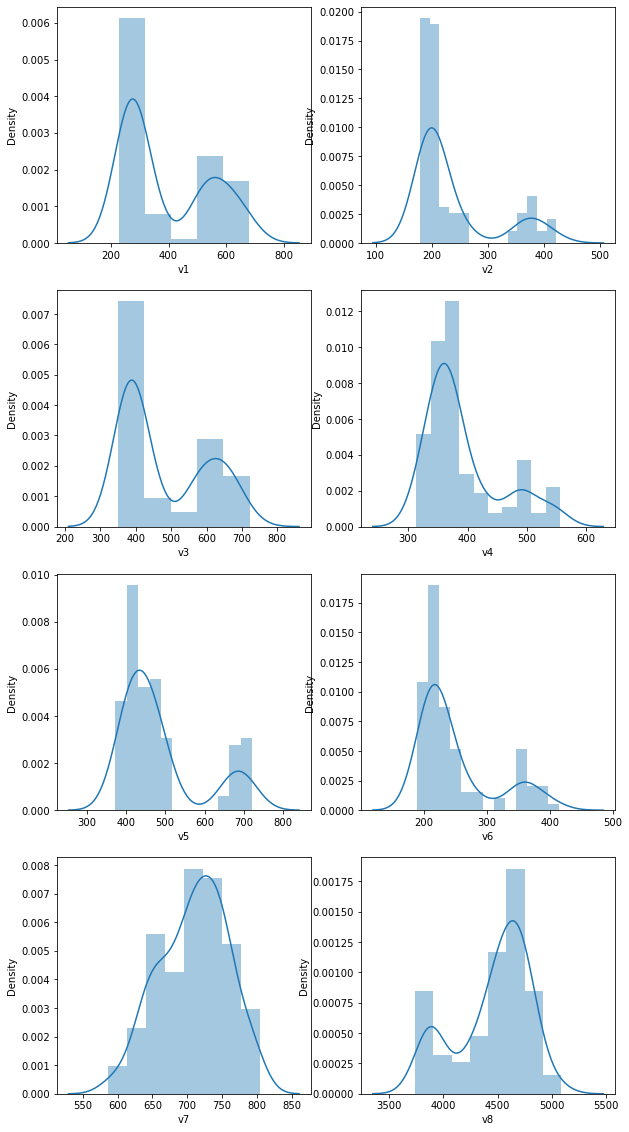

In [37]:
fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(10,20))
x=0
for i in range(4):
  for j in range(4):
    try:
      sns.distplot(eda_df[num_col[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

Visualisasi di atas adalah visualisasi yang menggambarkan distribusi data di setiap kolom numerik dari v1 sampai v8. Suatu kolom dinyatakan memiliki datat ditribusi normal apabila memiliki nilai skewness di antara -0.5 sampai 0.5, sedangkan data tidak distribusi normal memiliki nilai skewness kurang dari(<) -0.5 atau lebih dari(>) 0.5.

### Outliers Pada Feature Numerik

tahap ini memeriksa keberadaan outlier di setiap feature numerik. Jika ditemukan maka akan dihandling

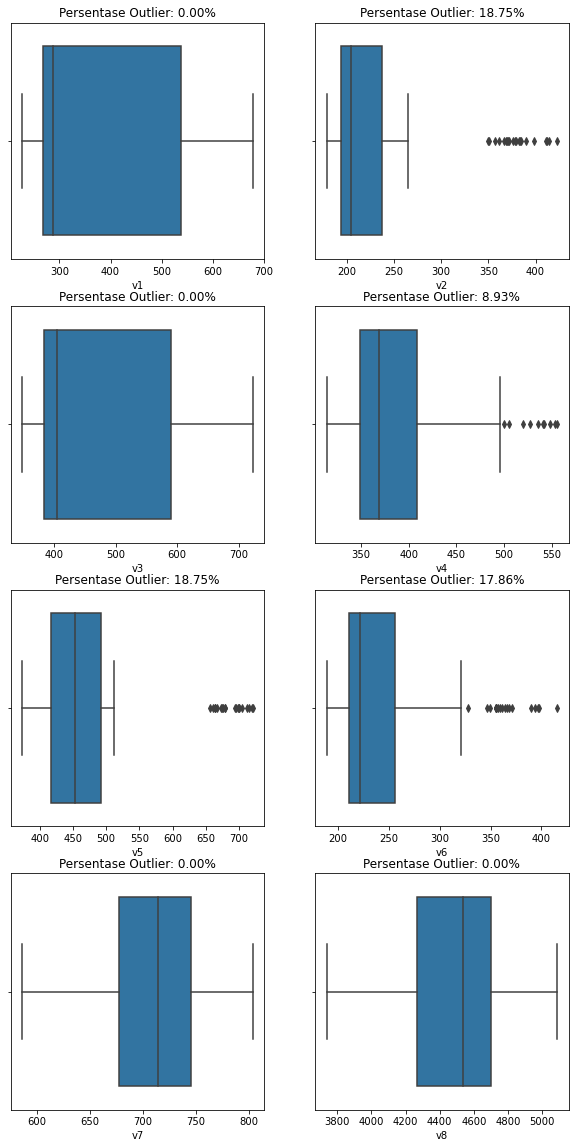

In [42]:
def outlier_analysis(eda_df,col):
  skewness = eda_df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = eda_df[col].mean() + 3*eda_df[col].std()
    lower = eda_df[col].mean() - 3*eda_df[col].std()
  else:
    Q1 = eda_df[col].quantile(0.25)
    Q3 = eda_df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
  
  no_outliers = eda_df[(eda_df[col]>=lower) & (eda_df[col]<=upper)]
  outliers = eda_df[(eda_df[col]<lower) | (eda_df[col]>upper)]

  return outliers,no_outliers, upper, lower

fig, ax = plt.subplots(ncols=2,nrows=4,figsize=(10,20))
x=0
for i in range(4):
  for j in range(4):
    try:
      out,no_out, up, low = outlier_analysis(eda_df,num_col[x])
      sns.boxplot(eda_df[num_col[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(eda_df)))
      x+=1
    except:
      pass
plt.show()

Berdasarkan perhitungan di atas diketahui bahwa data pada kolom v2 memiliki outlier mencapai 17.86%, kolom v4 memiliki 8.04%, v5 memiliki outlier 17.86%, dan v6 memiliki outlier 16.96%. Jumlah outlier di setiap kolom yang memiliki outlier melebihi 5% sehingga pada penelitian ini outlier akan dihandling dengan capping winsorizer agar  data tidak berkurang karena keterbatasan jumlah data yang tersedia. Capping winsorizer berfungsi untuk mengcapping pada data testing dan inference pada tahap selanjutnya

### Handling Outlier

In [43]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['v2','v4','v5','v6'])

df_eda_cleaned = wins.fit_transform(eda_df)

In [44]:

# Membandingkan kondisi outlier sebelum dan sesudah dihandling
print('before handling: \n', eda_df.describe())

before handling: 
                v1          v2          v3          v4          v5          v6  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean   389.592462  237.211331  478.758910  391.618028  485.333642  249.575034   
std    150.306130   71.955817  119.173725   62.769690  102.430167   59.833127   
min    227.285714  178.800000  348.933333  313.733333  373.333333  189.200000   
25%    268.153125  193.729762  383.421429  348.933333  416.550000  211.463889   
50%    288.443750  204.187500  404.762500  368.906250  452.366667  222.375000   
75%    537.733333  237.484375  589.819079  408.394792  492.643750  256.105208   
max    678.375000  422.812500  722.312500  555.600000  721.000000  415.375000   

               v7           v8      target  
count  112.000000   112.000000  112.000000  
mean   709.531973  4457.199094    4.740268  
std     48.582239   334.709298    0.203259  
min    586.266667  3738.466667    4.130000  
25%    677.183333  4266.86

In [45]:
print('after handling: \n', df_eda_cleaned.describe())

after handling: 
                v1          v2          v3          v4          v5          v6  \
count  112.000000  112.000000  112.000000  112.000000  112.000000  112.000000   
mean   389.592462  222.648389  478.758910  388.495251  470.382201  241.726988   
std    150.306130   42.504752  119.173725   55.874338   72.941297   43.925328   
min    227.285714  178.800000  348.933333  313.733333  373.333333  189.200000   
25%    268.153125  193.729762  383.421429  348.933333  416.550000  211.463889   
50%    288.443750  204.187500  404.762500  368.906250  452.366667  222.375000   
75%    537.733333  237.484375  589.819079  408.394792  492.643750  256.105208   
max    678.375000  303.116295  722.312500  497.586979  606.784375  323.067188   

               v7           v8      target  
count  112.000000   112.000000  112.000000  
mean   709.531973  4457.199094    4.740268  
std     48.582239   334.709298    0.203259  
min    586.266667  3738.466667    4.130000  
25%    677.183333  4266.862

Setelah melakukan capping, selanjutnya dilihat perbedaan setelah dan sebelum capping, dari hasil diatas terlihat perbedaan pada kolom v2,v4,v5,v6 setelah dan sebelum dicapping, hal ini berarti capping pada kolom v2,v4,v5,v6 berhasil dilakukan

### Korelasi Featuere Numerik

Tahap ini untuk mencari nilai korelasi antara feature `v1` sampai `v8` dengan kolom `target`. Berdasarkan nilai korelasi yang ada akan menjadi pertimbangan feature mana saja kah yang akan memasuki model di atahp selanjutnya. Metode yang digunakan adalah metode `Spearman` dan metode `Pearson`

### Metode Spearman

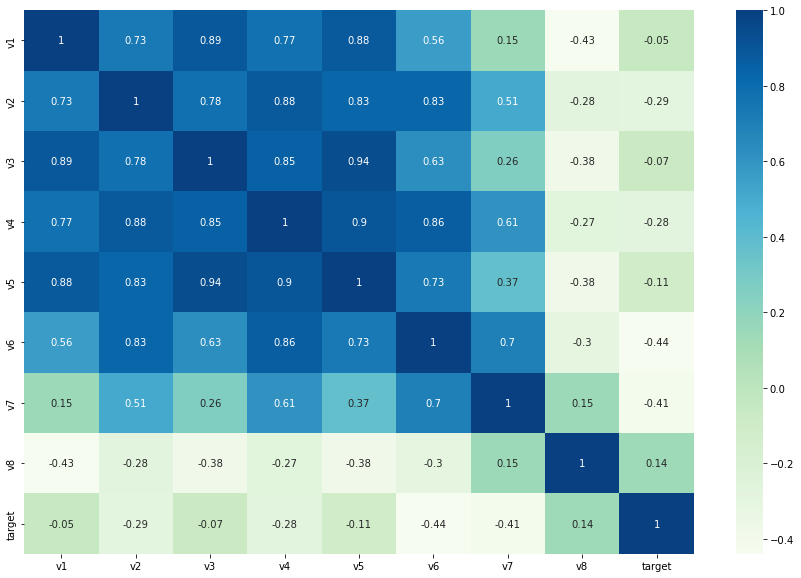

In [46]:
kor_feat = df[num_col].copy()
kor_feat['target'] = df['target']
plt.figure(figsize=(15, 10))
sns.heatmap(round(kor_feat.corr(method='spearman'), 2), annot=True, mask=None, cmap='GnBu')
plt.show()

### Metode Pearson

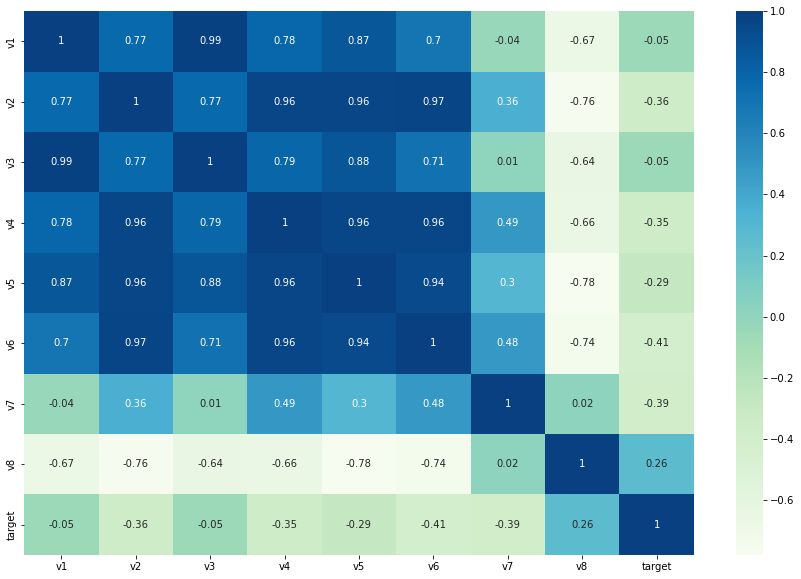

In [47]:
kor_feat = df[num_col].copy()
kor_feat['target'] = df['target']
plt.figure(figsize=(15, 10))
sns.heatmap(round(kor_feat.corr(method='pearson'), 2), annot=True, mask=None, cmap='GnBu')
plt.show()

erdasarkan nilai korelasi di atas, peneliti menetapkan tresshold minimal bernilai 0.25. Treshold dalam data science adalah suatu nilai batas atau ambang batas yang ditetapkan untuk menentukan apakah suatu hasil atau prediksi dinyatakan signifikan atau tidak. jadi apabila nilai korelasi di atas 0.25 atau di bawah -0.25 maka dinyatakan memiliki korelasi yang cukup signifikan. Pada penelitian ini kolom `v2`,`v4`,`v5`,`v6`, `v7`, dan `v8` memiliki pengaruh yang signifikan terhadap kolom target

Dari hasil uji korelasi di atas maka list kolom pada feature numerik yang akan digunakan pada pemodelan sebagai berikut :

In [ ]:
num_col_final = ['v2','v4','v5','v6','v7','v8']

### Feature Kategorikal

Pada tahap ini peneliti ingin mengetahui apa saja yang terdapat pada feature kategorik dan akan membuat keputusan apakah feature kategorik akan masuk ke dalam model atau tidak. Peneliti akan menggunakan metode uji chi-square

In [48]:
eda_cat=df_eda_cleaned[cat_col]

In [49]:
eda_cat['sample_type'].value_counts()

lab 1    70
lab 2    42
Name: sample_type, dtype: int64

Feature Kategorikal hanya memiliki satu kolom pada penelitian ini yaitu kolom `sample_type` di mana kolom ini hanya memiliki 2 unique value

In [50]:
cat_col_final=cat_col

In [51]:
chi_list = ['sample_type']

In [52]:
cat_final = []
for col in chi_list :
    contingency_table = pd.crosstab(df[col], df["target"])
    stat, p, dof, excepted = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%f' % (p))
    if p > 0.05 :
        print('Probably independent')
    else:
        print('Probably dependent')
        cat_final.append(col)
    print('\n')

    

sample_type
p=0.126987
Probably independent




Jika nilai p-value sebesar 0.126987, maka dapat disimpulkan bahwa kemungkinan besar tidak ada hubungan yang signifikan antara kolom kategorikal "sample_type" dengan variabel target. Oleh karena itu, kolom ini mungkin tidak terlalu relevan untuk dimasukkan ke dalam model. Kolom ini tidak digunakan dalam pemodelan

Membuat variabel yang berisi kolom-kolom yang akan digunakan untuk ke tahap selanjutnya

In [54]:
num_col_final = ['v2','v4','v5','v6','v7','v8']
cat_col_final= ['sample_type']
num_cat_target =['v2','v4','v5','v6','v7','v8','target']

### Data train final 

In [55]:
eda_df_final = df_eda_cleaned[num_cat_target]

### Data Test

In [56]:
data_test = pd.concat([X_test,y_test], axis=1)
data_test

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,target
110,482.562500,191.312500,559.875000,353.125000,477.000000,195.250000,638.812500,4462.062500,lab 2,4.95
112,505.866667,184.266667,547.866667,337.933333,460.666667,196.333333,596.400000,4430.066667,lab 2,5.00
143,616.933333,333.600000,654.600000,494.533333,655.733333,350.266667,723.866667,3823.000000,lab 2,4.34
7,248.933333,203.933333,365.200000,332.933333,390.933333,202.200000,664.000000,4646.200000,lab 1,4.74
44,269.933333,205.666667,393.200000,371.333333,459.800000,241.266667,755.733333,4699.600000,lab 1,4.83
101,504.357143,211.285714,626.642857,436.785714,502.071429,214.857143,806.857143,4836.571429,lab 2,4.93
122,534.333333,226.733333,592.266667,377.600000,496.133333,230.866667,690.200000,4508.000000,lab 2,4.90
66,298.437500,201.562500,419.062500,396.750000,467.875000,239.750000,801.562500,4495.437500,lab 1,4.48
85,332.500000,254.437500,430.437500,419.375000,475.312500,264.125000,745.312500,4747.750000,lab 1,4.63
86,333.714286,261.785714,461.142857,437.357143,492.428571,273.428571,791.142857,4780.928571,lab 1,4.66


Membuat kolom data test final yang telah dilakukan seleksi feature

In [57]:
data_test_final = data_test[num_cat_target]

Split Data : X feature dan y target

In [58]:
X_train = eda_df_final.drop('target',axis=1).copy()
y_train = eda_df_final['target']

X_test = data_test_final.drop('target',axis=1).copy()
y_test = data_test_final['target']

## 5. Prepocessing

### Pipeline Numerik

Pipeline Numerical berisi langkah-langkah yang dilakukan pada feature numerik yaitu feature scaling

In [60]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

Feature numerik di penelitian ini didominasi data distribusi tidak normal sehingga umumnya scaler yang digunakan scaler `minmax`

### Full Pipeline

In [61]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_col_final)
    ])

Melakukan preprocessing pada X train

In [62]:
X_train_pipe = full_pipeline.fit_transform(X_train)

Menerapkan preprocessing pada X test

In [63]:
X_test_pipe = full_pipeline.transform(X_test)

## 6.Model Definition

Model yang akan digunakan terdiri dari beberapa pilihan yaitu antara lain : Linear Regression, Ridge, Decision Tree, dan Random Forest. Model diseleksi untuk dipilih menjadi model terbaik dalam penelitian ini berdasarkan tingkat akurasi tertinggi dan standar deviasi yang mendekati 0. Kemudian model yang dipilih akan dievaluasi kinerjanya dengan cara mengukur nilai `Mean Absolute Error (MAE)` dan `R2 Score`.
> Mean Absolute Error (`MAE`) digunakan untuk mengukur seberapa jauh rata-rata prediksi model dari nilai sebenarnya, tanpa memperhitungkan arah perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin baik performa model.

> `R2 Score` adalah ukuran evaluasi kinerja model regresi dalam mengikuti trend data pada dataet, `R2 Score` memiliki rentang dari 0 sampai 1 semakin mendekati 1 maka model dinilai mampu membaca trend dengan baik jika mendekati 0 maka semakin buruk. pada penelitian ini nilai `R2 Score` tidak terlalu besar karena data yang tersedia tidak terlalu banyak

### Definisi Model Linear Regression

In [64]:
linreg = LinearRegression()

### Definisi Model Ridge Regression

In [65]:
rid_model = Ridge()

### Definisi Model Decision Tree Regression

In [66]:
dt_model = DecisionTreeRegressor(random_state=0)

### Definisi Model Random Forest Regression

In [67]:
rf_model = RandomForestRegressor(random_state=0)

## 7.Model Training

Tahap ini adalah tahap model akan melakukan proses training

### Training Model Linear Regression

In [68]:
linreg.fit(X_train_pipe, y_train)

LinearRegression()

In [69]:
scores_linreg = cross_val_score(linreg, X_train_pipe, y_train, cv=5)
scores_linreg

array([0.08378207, 0.06542397, 0.15627333, 0.28308552, 0.23703722])

In [97]:
print("Model ini memiliki akurasi sebesar %0.2f dan standard deviation sebesar %0.2f" % (scores_linreg.mean(), scores_linreg.std()))

Model ini memiliki akurasi sebesar 0.17 dan standard deviation sebesar 0.08


### Training Model Ridge

In [71]:
rid_model.fit(X_train_pipe, y_train)

Ridge()

In [72]:
scores_rid_model = cross_val_score(rid_model, X_train_pipe, y_train, cv=5)
scores_rid_model

array([0.13398868, 0.04660705, 0.17671397, 0.28827857, 0.27705422])

In [99]:
print("Model ini memiliki akurasi sebesar %0.2f dan standard deviation sebesar %0.2f" % (scores_rid_model.mean(), scores_rid_model.std()))

Model ini memiliki akurasi sebesar 0.18 dan standard deviation sebesar 0.09


### Training Model Decision Tree Regression

In [74]:
dt_model.fit(X_train_pipe, y_train)

DecisionTreeRegressor(random_state=0)

In [75]:
scores_dt_model = cross_val_score(dt_model, X_train_pipe, y_train, cv=5)
scores_dt_model

array([-0.72595681, -1.32196781, -1.35806996, -0.2830622 , -3.16980174])

In [100]:
print("Model ini memiliki akurasi sebesar %0.2f dan standard deviation sebesar %0.2f" % (scores_dt_model.mean(), scores_dt_model.std()))

Model ini memiliki akurasi sebesar -1.37 dan standard deviation sebesar 0.98


### Training Model Random Forest Regression

In [77]:
rf_model.fit(X_train_pipe, y_train)

RandomForestRegressor(random_state=0)

In [78]:
scores_rf_model = cross_val_score(rf_model, X_train_pipe, y_train, cv=5)
scores_rf_model

array([-0.16700684, -0.27987993,  0.22482411,  0.31560973, -0.03668346])

In [101]:
print("Model ini memiliki akurasi sebesar %0.2f dan standard deviation sebesar %0.2f" % (scores_rf_model.mean(), scores_rf_model.std()))

Model ini memiliki akurasi sebesar 0.01 dan standard deviation sebesar 0.23


Setelah mengukur skor skor validation dan mengukur akurasi serta standar deviasi dari setiap pilihan model yang tersedia. Peneliti akan menggunakan model dengan akurasi tertinggi yaitu model `Ridge` dengan akurasi `0.18` dan standar deviasi `0.09`. Meskipun model ini memiliki standar deviasi yang lebih besar dibandingkan dengan model linear regression tetap saja selisihnya tidak signifikan karena nilai `0.09` masih mendekati nilai 0. Acuan utama adalah nilai akurasi 

## 8. Model Evaluation

### Model Ridge Baseline

Model dengan parameter baseline berarti model dengan parameter dasar atau parameter default.

In [82]:
pred_train_rid = rid_model.predict(X_train_pipe)
pred_test_rid = rid_model.predict(X_test_pipe)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

==================== TRAINING ====================
Mean absolute error: 0.14253230238750877
R2 Score: 0.2574702956771875
==================== TEST ====================
Mean absolute error: 0.17311051306659628
R2 Score: 0.238876913743153


Nilai `MAE` saat `training` dan `test` dinilai `good fit` karena selisih nya tidak signifikan yaitu hanya selisih `0.03` dimana nilai tersebut masih mendekati nilai 0. nilai `R2 Score` pada model baseline juga dinilai `good fit` karena hanya selisih `0.02`. Tahap selanjutnya peneliti akan melakukan hyperparameter tunning sebagai upaya untuk memperoleh nilai `MAE` yang lebih kecil dan nilai `R2 Score` lebih besar

### Hyperparameter Tuning

Tahap ini bertujuan untuk mencari kombinasi parameter terbaik sebelum model melakukan `training` dan `test`.

In [83]:
paramsrid = [
    {                                                      
     'solver': ['auto','svd','cholesky', 'sparse_cg', 'lsqr', 'saga', 'lbfgs'],       #7
     'alpha': [0.1, 0.5, 0.7, 1]                                            #4
     }    #   7*4=28 kombinasi      
  ]

grid_search_ridge = GridSearchCV(rid_model, paramsrid,
                           scoring='neg_mean_absolute_error', n_jobs= -1,
                           return_train_score=True)
                           
grid_search_ridge.fit(X_train_pipe, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.1, 0.5, 0.7, 1],
                          'solver': ['auto', 'svd', 'cholesky', 'sparse_cg',
                                     'lsqr', 'saga', 'lbfgs']}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [84]:
grid_search_ridge.best_params_

{'alpha': 1, 'solver': 'saga'}

In [85]:
grid_search_ridge.best_score_

-0.1480100669838411

In [86]:
best_model_ridge = grid_search_ridge.best_estimator_

In [87]:
pred_train_rid_tuning = best_model_ridge.predict(X_train_pipe)
pred_test_rid_tuning = best_model_ridge.predict(X_test_pipe)

print("="*20,"TRAINING SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))

print("="*20,"TEST SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

print("="*20,"TRAINING SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid_tuning))
print("R2 Score:",r2_score(y_train,pred_train_rid_tuning))

print("="*20,"TEST SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid_tuning))
print("R2 Score:",r2_score(y_test,pred_test_rid_tuning))



==================== TRAINING SEBELUM TUNING ====================
Mean absolute error: 0.14253230238750877
R2 Score: 0.2574702956771875
==================== TEST SEBELUM TUNING ====================
Mean absolute error: 0.17311051306659628
R2 Score: 0.238876913743153
==================== TRAINING SETELAH TUNING ====================
Mean absolute error: 0.14252943944470542
R2 Score: 0.25745023220311614
==================== TEST SETELAH TUNING ====================
Mean absolute error: 0.17312635281554992
R2 Score: 0.23879298233211577


Model dengan hyperparameter memiliki selisih nilai `MAE` antarat `training` dengan `test` hanya selisih `0.03` saja dan selisih nilai `R2 Score` hanya `0.02` berarti model baseline dan hyperparameter memiliki performa yang mirip dalam mengolah data di penelitian ini.

### Combine Pipeline : Preprocessing + Model

In [88]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("ridge", best_model_ridge)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print("Mean absolute error:",mean_absolute_error(y_test,hasil))
print("R2 Score:",r2_score(y_test,hasil))

Mean absolute error: 0.17310575271834194
R2 Score: 0.23898296870254454


## 9.Model Inference

Data Inference adalah data baru yang diambil dari input data terbaru yang akan digunakan untuk memasuki model pada penelitian ini data inference akan dibuat dengan data baru

In [89]:
new_data = {'target': "4.89",
  'v1': "438.78",
  'v2': "195.853",
  'v3': '500.76',
  'v4': "354.897",
  'v5': '678.324',
  'v6': "222.124",
  'v7': "788.856",
  'v8': "4588.777",
  'sample_type': "lab 1",
  }


new_data = pd.DataFrame([new_data])
new_data

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.89,438.78,195.853,500.76,354.897,678.324,222.124,788.856,4588.777,lab 1


In [90]:
new_data = new_data[[col for col in new_data.columns if col != 'target'] + ['target']]



In [91]:
data_inf_final=new_data[num_cat_target]

In [92]:
all_process.predict(data_inf_final)

array([4.83366304])

In [93]:
new_data['target_prediction'] = all_process.predict(data_inf_final)
compare = new_data[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7','v8','sample_type','target', 'target_prediction']]
compare

,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,target,target_prediction
0,438.78,195.853,500.76,354.897,678.324,222.124,788.856,4588.777,lab 1,4.89,4.833663


Pada data aktual nilai target sebesar 4.89 sedangkan model mampu membuat prediksi terhadap nnilai target sebesar 4.83. Selisih nilai target aktualo dan prediksi hanya sebesar `0.06`. Bearti model ini mampu memprediksi dengan baik karena selisih nilai prediksi dengan nilai aktual masih mendekati nilai 0

## 10. Model Saving

In [94]:
# save model
pickle.dump(all_process, open("target_pred.pkl", "wb"))

In [95]:
set_config(display='diagram')

In [96]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['v2', 'v4', 'v5', 'v6', 'v7',
                                                   'v8'])])),
                ('ridge', Ridge(alpha=1, solver='saga'))])

## 11.Kesimpulan

Berdasarkan penelitian yang telah dilakukan, dapat disimpulkan bahwa :
1. nilai target paling rendah berada di `lab 2` dengan nilai `4.13` dan paling tinggi berada di `lab 1` dengan nilai `5.26`

2. Berdasarkan feature `v1` sampai `v8` dapat disimpulkan bahwa dari `v1` sampai `v5` nilai data terendah selalu berasal dalr `lab 1` dan data dengan nilai tertinggi berasal dari `lab 2`. Untuk `v6` nilai terendah dan tertinggi berasal dari `lab 2` , lalu `v7` dan `v8` nilai terendah berasal dari `lab 2` dan nilai tertinggi berasal dari `lab 1`

3. Pada penelitian ini memiliki beberapa pilihan untuk memilih model, setelah mengukur tingkat akurasi di setiap model maka model `ridge` terpilih karena memiliki nilai akurasi tertinggi yaitu sebesar `0.18`

4. Pada penelitian ini model dengan parameter `baseline` dinilai `good fit` karena saat proses `trainiing` memiliki `MAE` sebesar `0.14` dan saat model melakukan `test` memiliki `MAE` sebesar `0.17` dimana hanya selisih `0.03` yang tidak terlalu signifikan. Saat model diberikan `hyperparameter tuning` diperoleh hasil `train` dan `test` sama seperti model parameter `baseline`.


5. Pada poin ini akan membahas tentang `MAE` dan `R2 Score` yang diketahui bahwa :
- Mean Absolute Error (`MAE`) mengukur seberapa jauh rata-rata prediksi model dari nilai sebenarnya, tanpa memperhitungkan arah perbedaan antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai MAE, semakin baik performa model. 

Pada penelitian ini `MAE` pada proses `test` sebesar `0.17` itu berarti model memiliki potensi selisih absolute (bisa bernilai positif atau negatif)  dari nilai sebenarnya sebesar `0.17`

- `R2 Score` adalah ukuran evaluasi kinerja model regresi dalam mengikuti trend data pada dataet, `R2 Score` memiliki rentang dari 0 sampai 1 semakin mendekati 1 maka model dinilai mampu membaca trend dengan baik jika mendekati 0 maka semakin buruk. pada penelitian ini nilai `R2 Score` tidak terlalu besar karena data yang tersedia tidak terlalu banyak

6. Saat Model dimasukan dengan `data inference` maka hasil prediksi nilai targetnya adalah `4.83` sedangkan nilai aktual targetnya sebesar `4.89`. Selisih antara nilai aktual dengan nilai prediksi hanya `0.06` yang dinilai sangat kecil dan tidak signifikan.

### Improvement

> Dataset yang tersedia mungkin dapat ditambah lebih banyak agar model lebih mudah mempelajari data dan melakukan prediksi. 
> feature dalam dataset mungkin bisa lebih diperjelas agar memudahkan penelitian dalam menarik kesimpulan misalnya di kolom target akan lebih mudah jika mengetahui apakah semakin tinggi nilai target berarti penelitian nutrisi semakin baik atau semakin buruk.